In [ ]:
! sudo apt-get update
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-extra cm-super

In [3]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}', r'\RequirePackage[libertine]{newtxmath}'] 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc
from cycler import cycler

mpl.rcParams['ps.usedistiller'] = 'xpdf' 

plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

monochrome=(cycler('color', sns.color_palette("husl", 8))*2+(cycler('marker', ['v', 's', "o"])*7)[0:16])
plt.rc('axes', prop_cycle=monochrome)

pd.options.display.max_rows = 999

Setting rcParams['ps.usedistiller'] to 'xpdf' requires xpdf.


In [4]:
purples5 = sns.color_palette("Purples_r", 5)
blues5 = sns.color_palette("Blues_r", 5)
reds5 = sns.color_palette("Reds_r", 5)

In [5]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
masterdata = pd.read_csv("/content/gdrive/MyDrive/GMCDE/experiments/convergence/ConvDE/2022-01-15-14-42_ConvDE_scala/ConvDE_scala.csv")

In [7]:
masterdata["genId"].unique()

array(['independent-i-10-0.0-gaussian-0', 'linear-l-10-0.4-gaussian-0',
       'independent_linear_stripe-ils-10-0.2-gaussian-0'], dtype=object)

In [8]:
masterdata["genId"] = [x.split("-")[1] for x in masterdata["genId"]]

In [9]:
masterdata.head(10)

,genId,estimator,iteration_num,rep,contrast,cpu_time,real_contrast
0,i,R,30,5938,0.398146,225.909876,0.429961
1,i,R,30,313,0.415608,224.552262,0.429961
2,i,R,30,17501,0.429524,234.868935,0.429961
3,i,R,30,1407,0.413994,263.735432,0.429961
4,i,R,30,1563,0.418414,260.335553,0.429961
5,i,R,30,25001,0.466426,237.483180,0.429961
6,i,R,30,12501,0.520798,263.155783,0.429961
7,i,R,30,1876,0.440658,242.148779,0.429961
8,i,R,30,6563,0.383646,267.934527,0.429961
9,i,R,30,27501,0.442415,237.322548,0.429961


In [10]:
pretty_names = {
    "i": "Uniform, 10 dimensional",
    "l": "Linear, 10 dimensional, 0.4 noise",
    "hc": "Hypercube, 10 dimensional, 0.2 noise",
    "ils": "Uniform Linear Stripe, 10 dimensional, 0.2 noise"
}

In [11]:
all_estimators =  np.array(['R','ItR','ItGR', 'ItGI', 'ItGIBEV'])
new_estimators = np.array(['ItR','ItGR', 'ItGI', 'ItGIBEV'])
group_estimators = np.array(['ItGR', 'ItGI', 'ItGIBEV'])
best_estimators = np.array(['ItGI', 'ItGIBEV'])

In [12]:
estimator_color_dict = {
    'R':"green",
    'ItR': "purple",
    'ItGR': "orange",
    'ItGI': 'blue',
    'ItGIBEV': 'red'
}

In [13]:
%matplotlib inline

In [14]:
def get_contrasts(subdata, iteration_num):
    return subdata[subdata["iteration_num"] == iteration_num]["contrast"].to_numpy()

In [30]:
def plot_mean(start, end, step = 1):
  f, axarr = plt.subplots(1,3, figsize=(28,7))
  axes = axarr.flatten()
  x_label_fontsize = 40
  y_label_fontsize = 50
  it = np.arange(start, end + 1, step)

  def subplot(genId, title, ytitle = False):
    data = masterdata[masterdata["genId"] == genId]
    for est in all_estimators:
      subdata = data[data["estimator"] == est]
      means = np.array([np.mean(get_contrasts(subdata, j)) for j in range(start, end+1, step)])
      plt.plot(it, means, '-', color = estimator_color_dict[est], label = est)
    plt.legend(loc = "lower left", prop={"size":22})
    subdata = data[data["estimator"] == "R"]
    contrasts = get_contrasts(subdata, start)
    ax = plt.gca()
    ax.set_ylim([np.quantile(contrasts, 0.1), np.quantile(contrasts, 0.9)])
    plt.grid()
    plt.xlabel(r"$N$", fontsize = x_label_fontsize)
    if ytitle:
      plt.ylabel(r"Expectation of $\hat{C}$", fontsize = y_label_fontsize)
    plt.xticks(fontsize=40)
    plt.yticks(fontsize=40)
    plt.title(title, fontsize = 50)
  
  plt.sca(axes[0])
  subplot("i", r"(i)", True)
  plt.sca(axes[1])
  subplot("l", r"(ii)")
  plt.sca(axes[2])
  subplot("ils", r"(iii)")
  plt.savefig("defc_mean", bbox_inches='tight')

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **

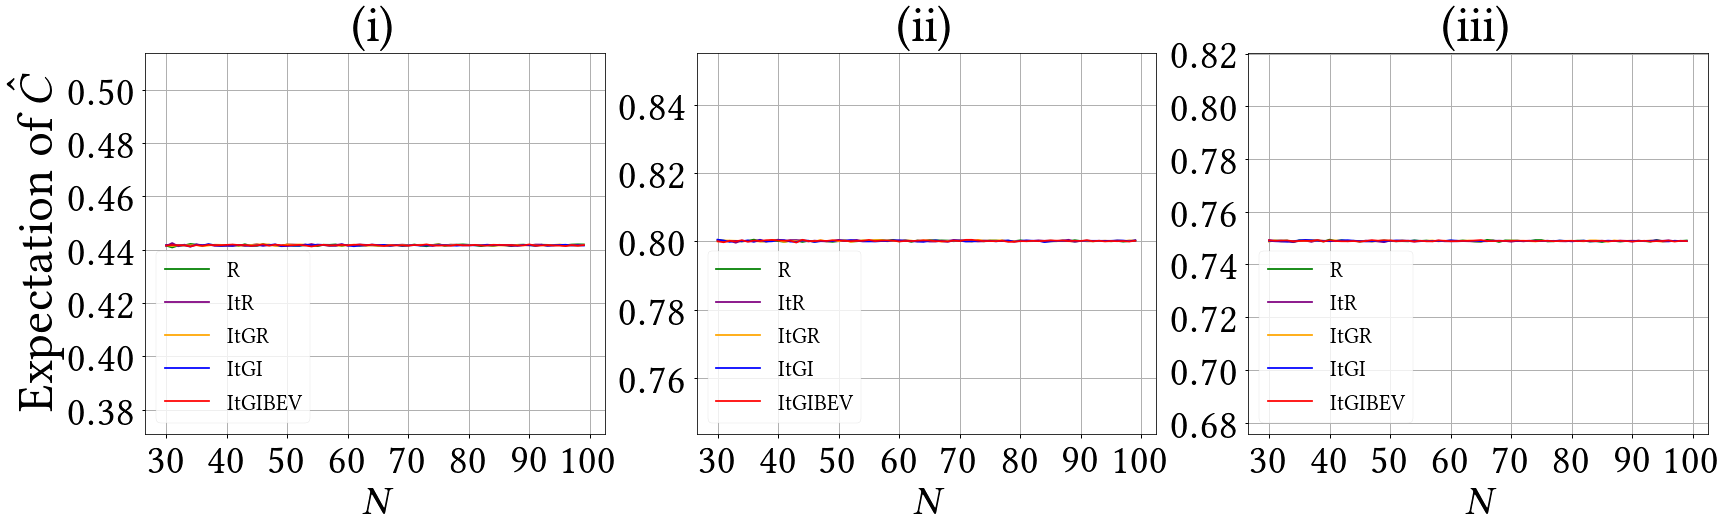

In [31]:
plot_mean(30,100)

In [17]:
def plot_cpu_time(start, end, step = 1):

  def get_CPU_time_mean(subdata, iteration_num):
    subsubdata = subdata[subdata["iteration_num"] == iteration_num]
    CPU_time = (subsubdata["cpu_time"]).to_numpy()
    return np.mean(CPU_time)

  f, axarr = plt.subplots(1,3, figsize=(33,9))
  axes = axarr.flatten()
  x_label_fontsize = 40
  y_label_fontsize = 40
  it = np.arange(start, end + 1, step)

  def subplot(genId, title, ytitle= False):
    data = masterdata[masterdata["genId"] == genId]
    for est in all_estimators:
      subdata = data[data["estimator"] == est]
      means = np.array([get_CPU_time_mean(subdata, j) for j in range(start, end+1, step)])
      plt.plot(it, means, '-', color = estimator_color_dict[est],label = est)
    plt.legend(loc = "lower right", prop={"size":22})
    plt.grid()
    plt.xlabel("N", fontsize = x_label_fontsize)
    if ytitle:
      plt.ylabel("Expectation of CPU time (ms)", fontsize = y_label_fontsize)
    plt.xticks(fontsize=40)
    plt.yticks(fontsize=40)
    plt.title(title, fontsize = 50)

  
  plt.sca(axes[0])
  subplot("i", r"(i)", True)
  plt.sca(axes[1])
  subplot("l", r"(ii)")
  plt.sca(axes[2])
  subplot("ils", r"(iii)")
  plt.savefig("defc_cputime", bbox_inches='tight')

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **

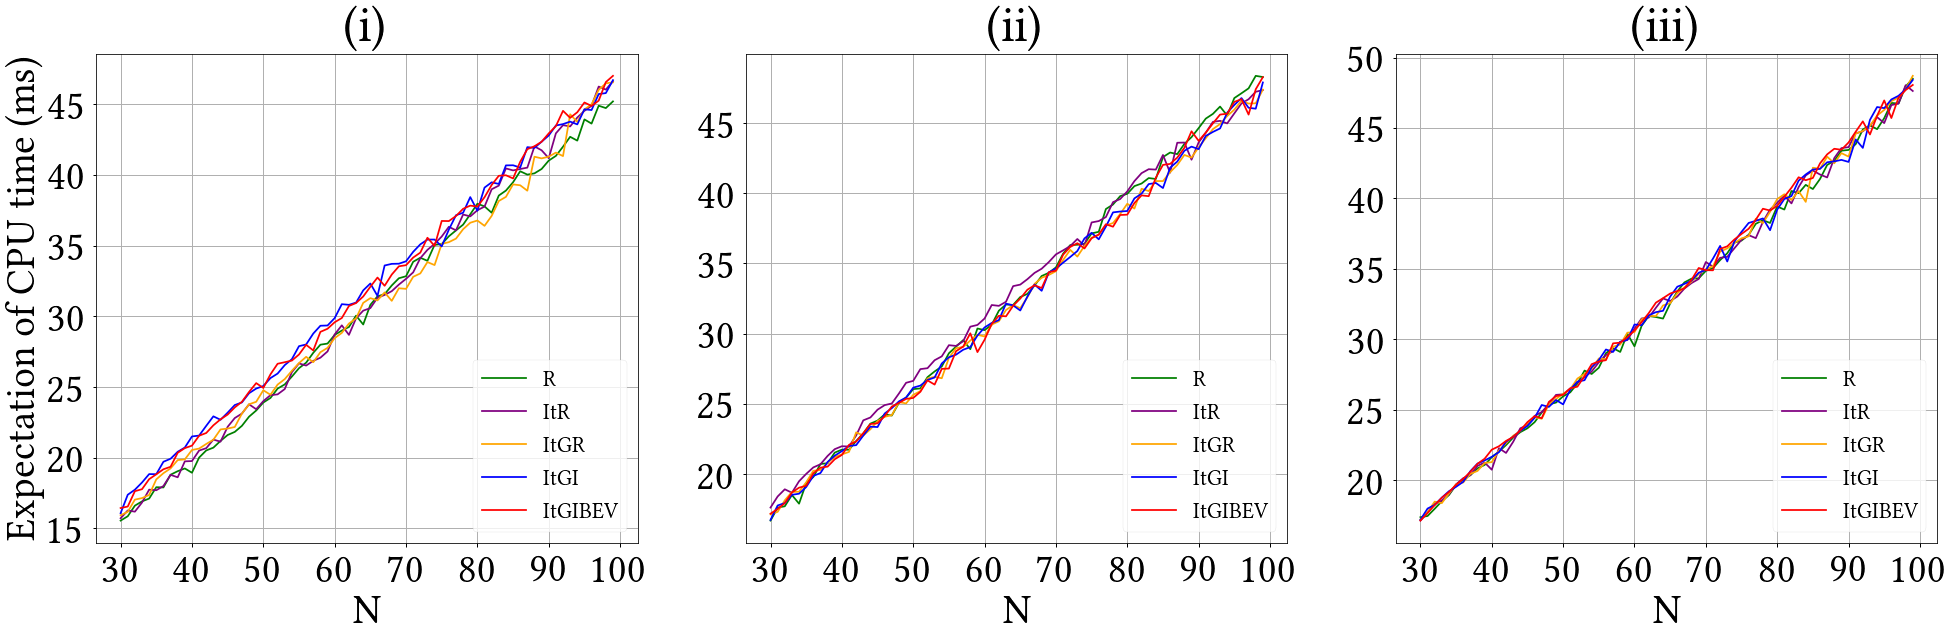

In [18]:
plot_cpu_time(30,100)

In [19]:
def plot_vars_undiluted():
  start = 30
  end = 100
  step = 1
  ests_list = [['R','ItR'], ['ItR','ItGR'], ['ItGR','ItGI'], ['ItGI','ItGIBEV']]
  f, axarr = plt.subplots(4,2, figsize=(20,28))
  #plt.suptitle(pretty_names[genId], fontsize = 25)
  axes = axarr.flatten()
  x_label_fontsize = 40
  y_label_fontsize = 30
  title_fontsize = 50
  it = np.arange(start, end + 1, step)
  xticks = [k for k in range(start,end + 1,5)]


  def compare(genId, ests, k):
      plt.sca(axes[k])
      data = masterdata[masterdata["genId"] == genId]
      for est in ests:
        subdata = data[data["estimator"] == est]
        vars = np.array([np.var(get_contrasts(subdata, j)) for j in range(start, end+1, step)])
        plt.plot(it, vars,'-', color = estimator_color_dict[est],linewidth= 3,label = est)

      plt.legend(loc = "upper right", prop={"size":30})
      ax = plt.gca()
      ax.set_xticks(xticks)
      ax.set_xticklabels(xticks)
      plt.xticks(fontsize=25)
      plt.yticks(fontsize=25)
      plt.grid()

      if (k == 0):
        ax.set_title("(i)", fontsize = title_fontsize)
      if (k == 1):
        ax.set_title("(ii)", fontsize = title_fontsize)
      if (k == 6 or k == 7):
        ax.set_xlabel("N", fontsize = x_label_fontsize)
      else:
        ax.set_xlabel("", fontsize = x_label_fontsize)
      if (k%2 == 0):
        ax.set_ylabel(r"Variance of $\hat{C}$", fontsize = y_label_fontsize)

  for i in range(0,4):
    compare("i", ests_list[i], 2*i)
    compare("l", ests_list[i], 2*i + 1)
  plt.savefig("defc_var_undiluted", bbox_inches='tight')

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-pa

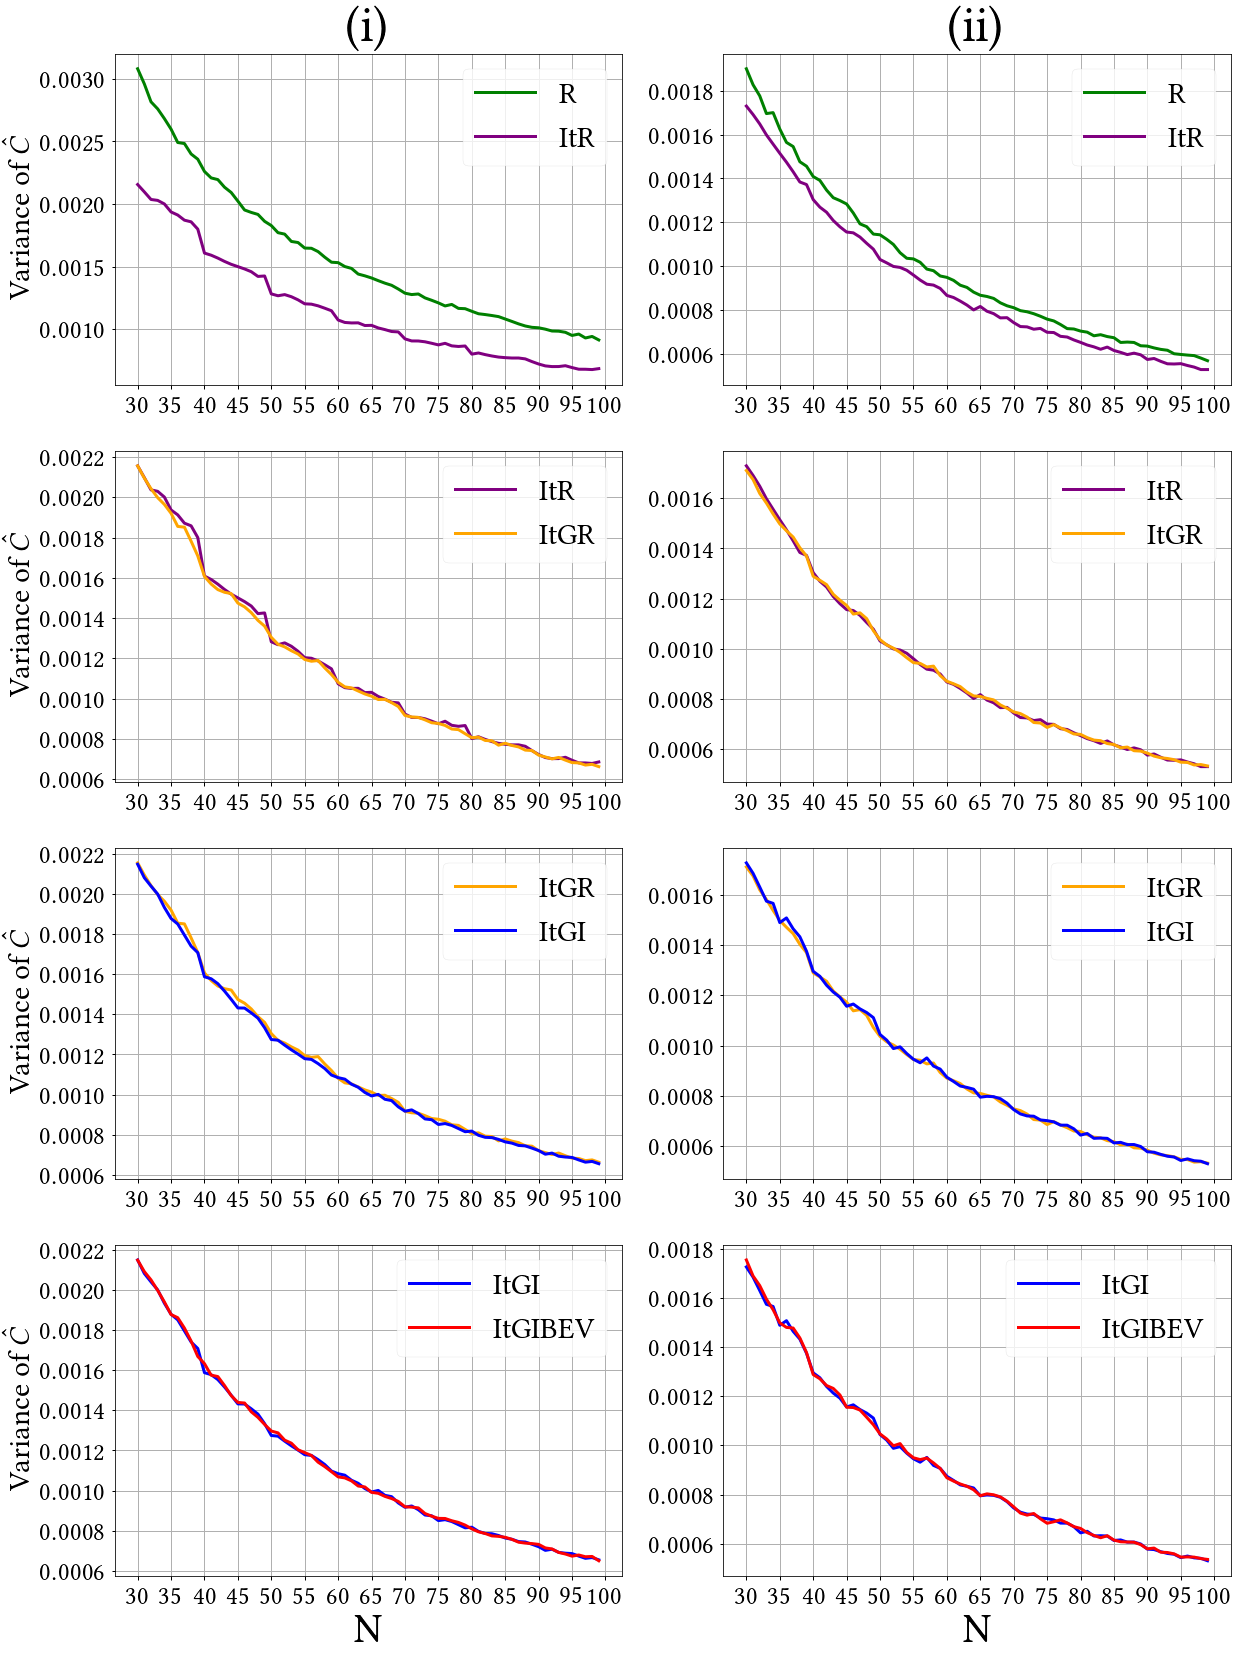

In [20]:
plot_vars_undiluted()

In [28]:
def plot_vars_diluted():
  start = 30
  end = 100
  step = 1
  ests_list = [['R','ItR'], ['ItR','ItGR'], ['ItGR','ItGI'], ['ItGI','ItGIBEV']]
  f, axarr = plt.subplots(4,1, figsize=(16,28))
  #plt.suptitle(pretty_names[genId], fontsize = 25)
  axes = axarr.flatten()
  x_label_fontsize = 40
  y_label_fontsize = 30
  title_fontsize = 50
  it = np.arange(start, end + 1, step)
  xticks = [k for k in range(start,end + 1,5)]


  def compare(genId, ests, k):
      plt.sca(axes[k])
      data = masterdata[masterdata["genId"] == genId]
      for est in ests:
        subdata = data[data["estimator"] == est]
        vars = np.array([np.var(get_contrasts(subdata, j)) for j in range(start, end+1, step)])
        plt.plot(it, vars,'-', color = estimator_color_dict[est],linewidth=3,label = est)

      plt.legend(loc = "upper right", prop={"size":30})
      ax = plt.gca()
      ax.set_xticks(xticks)
      ax.set_xticklabels(xticks)
      plt.xticks(fontsize=25)
      plt.yticks(fontsize=25)
      plt.grid()

      if (k == 0):
        ax.set_title("(iii)", fontsize = title_fontsize)
      if (k == 3):
        ax.set_xlabel("N", fontsize = x_label_fontsize)
      else:
        ax.set_xlabel("", fontsize = x_label_fontsize)
      ax.set_ylabel(r"Variance of $\hat{C}$", fontsize = y_label_fontsize)

  for i in range(0,4):
    compare("ils", ests_list[i], i)
  plt.savefig("defc_var_diluted", bbox_inches='tight')

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-pa

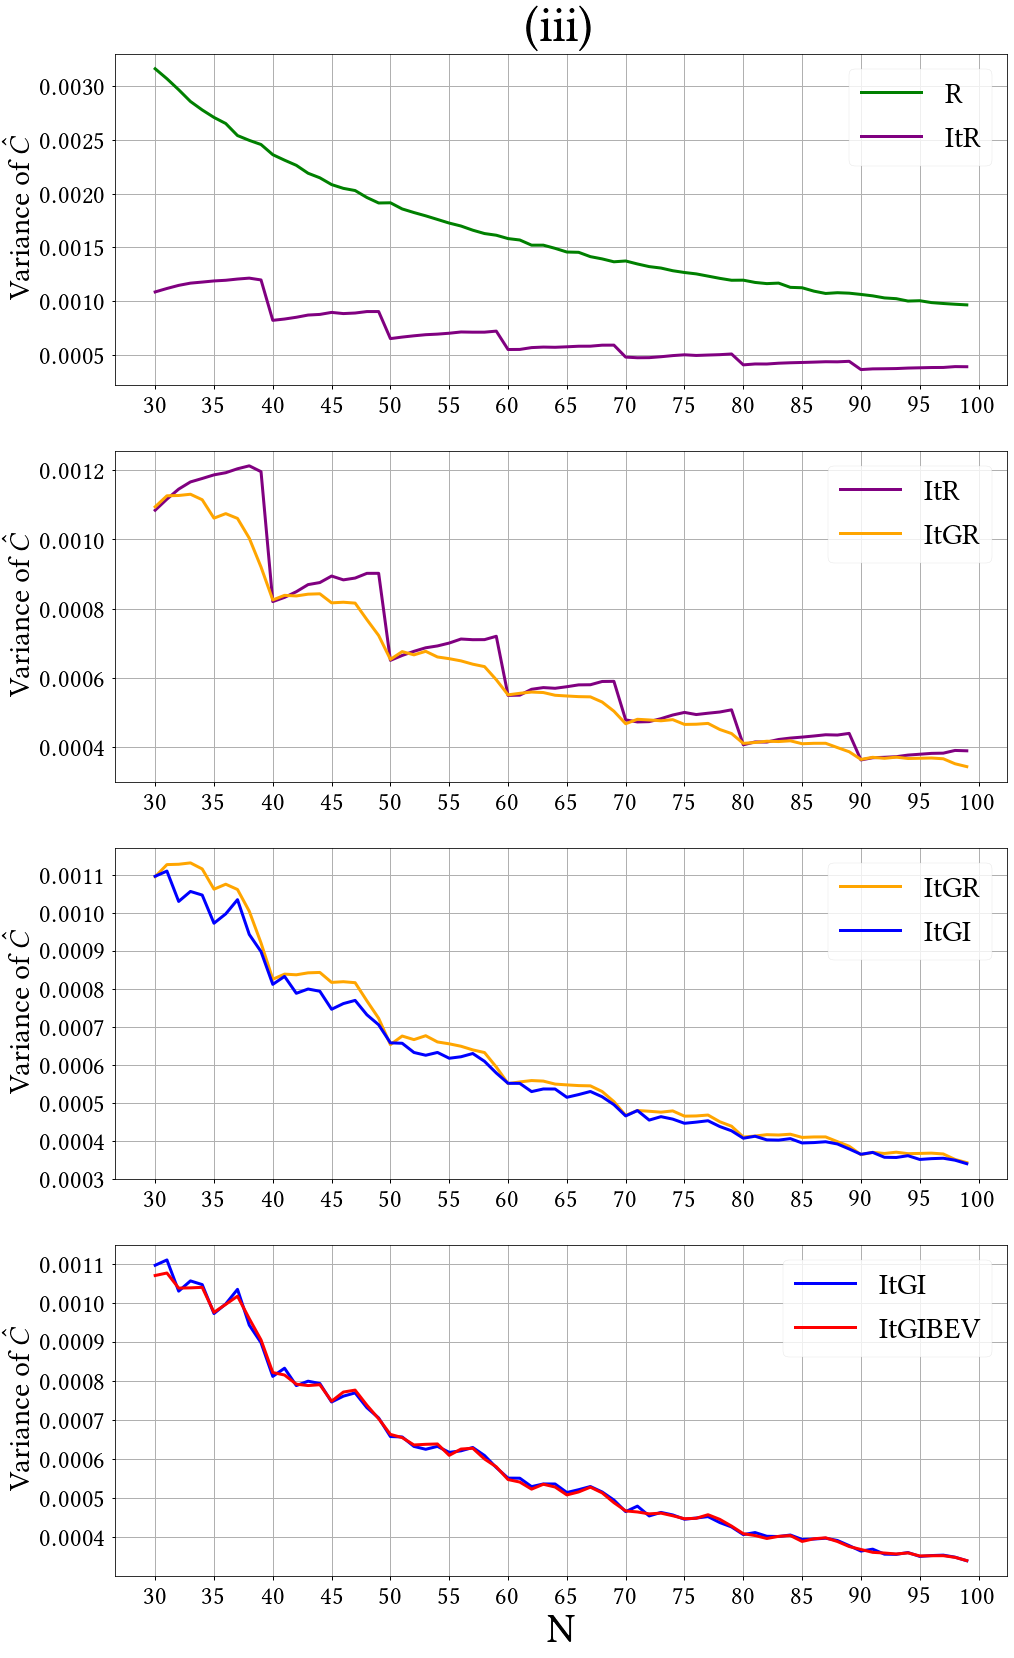

In [29]:
plot_vars_diluted()

In [23]:
masterdata_focus = pd.read_csv("/content/gdrive/MyDrive/GMCDE/experiments/convergence/ConvDE/2022-01-19-12-40_ConvBEV_scala/ConvBEV_scala.csv")
masterdata_focus["genId"] = [x.split("-")[1] for x in masterdata_focus["genId"]]

In [26]:
def plot_vars_diluted_focus():
  start = 30
  end = 40
  step = 1
  f = plt.figure(figsize=(16,7))
  x_label_fontsize = 40
  y_label_fontsize = 36
  title_fontsize = 50
  it = np.arange(start, end + 1, step)
  xticks = [k for k in range(start,end + 1,1)]
  ax = plt.gca()
  data = masterdata_focus[masterdata_focus["genId"] == "ils"]
  for est in ["ItGI","ItGIBEV"]:
    subdata = data[data["estimator"] == est]
    vars = np.array([np.var(get_contrasts(subdata, j)) for j in range(start, end+1, step)])
    plt.plot(it, vars,'-', color = estimator_color_dict[est],linewidth=3,label = est)
    
  ax.set_xticks(xticks)
  ax.set_xticklabels(xticks)
  ax.set_xlabel("N", fontsize = x_label_fontsize)
  ax.set_ylabel(r"Variance of $\hat{C}$", fontsize = y_label_fontsize)
  plt.legend(loc = "upper right", prop={"size":30})
  plt.xticks(fontsize=25)
  plt.yticks(fontsize=25)
  plt.grid()
  plt.savefig("defc_var_diluted_focus", bbox_inches='tight')

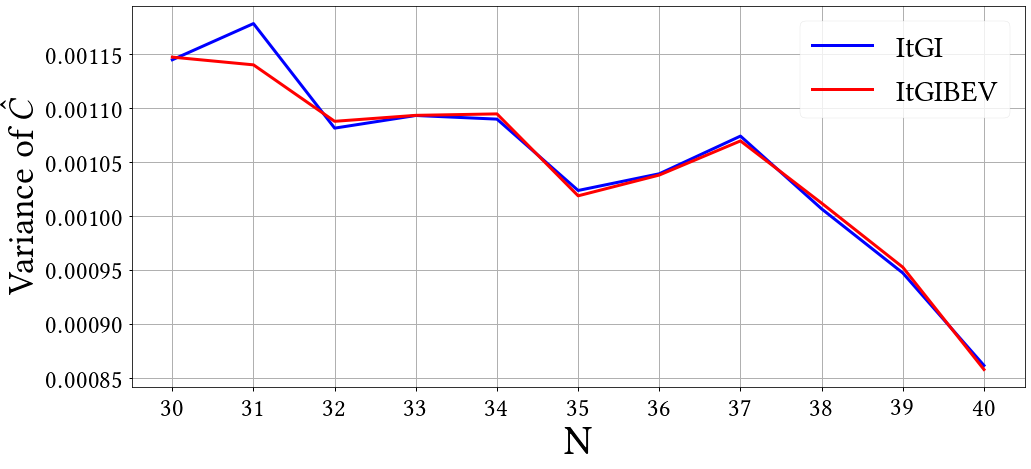

In [27]:
plot_vars_diluted_focus()